# Jellium
[?](?)

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA
from hnc.hnc.PIE_TwoElectron import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n, P_Ideal_Fermi_Gas, E_Ideal_Fermi_Gas, Degeneracy_Parameter 

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")


### Set Parameters in Paper and Plot

In [207]:
name = 'Jellium'
Z, A = 1,1 

Te_eV = 1 # eV
rs_AU = 1
rs_cm = rs_AU/cm_to_AU
ne_cc = n_from_rs(rs_cm)
ne_AU = n_from_rs(rs_AU)


#### Run Ornstein-Zernike Closure

In [208]:
# Helpful unit functions
P_hnc_to_AU   = lambda P_hnc, ri: (P_hnc/ri**3) 
P_hnc_to_bar  = lambda P_hnc, ri: P_hnc_to_AU(P_hnc, ri) *  AU_to_bar 
P_hnc_to_Mbar = lambda P_hnc, ri: 1e-6*P_hnc_to_bar(P_hnc, ri)
P_hnc_to_GPa  = lambda P_hnc, ri: P_hnc_to_bar(P_hnc, ri) * 1e5 / 1e9 
E_hnc_to_eV   = lambda E_hnc, ri: E_hnc/(3/(4*π)) * AU_to_eV

P_hnc_to_AU = np.vectorize(P_hnc_to_AU)
P_hnc_to_bar = np.vectorize(P_hnc_to_bar)
P_hnc_to_Mbar = np.vectorize(P_hnc_to_Mbar)
P_hnc_to_GPa = np.vectorize(P_hnc_to_GPa)
E_hnc_to_eV = np.vectorize(E_hnc_to_eV)

def get_jellium_P_Mbar(jellium_hnc):
    # jellium_hnc.h_r_matrix -= 1
    P_hnc = jellium_hnc.excess_pressure_matrix()
    # jellium_hnc.h_r_matrix += 1
    return P_hnc_to_Mbar(P_hnc)[0,0]


In [209]:
jellium_func = lambda Te_eV, ne_cc: PLASMA(1, 1, ne_cc, 1, Te_eV, Zbar=1, find_βuee=True,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'geometric'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':0.5, 'num_iterations':1e4})

# Make Jellium PLASMA object
jellium = jellium_func(Te_eV, ne_cc)
jellium.run_jellium_hnc(ideal=True)
# # Reset βvee
# βvee_Pauli   = jellium.qsp.βv_Pauli(  jellium.jellium_hnc.r_array , jellium.qsp.Λee )
# βvee_Pauli   = jellium.βP_ee
# βvee_Deutsch = jellium.qsp.βv_Deutsch( jellium.qsp.Γee, jellium.jellium_hnc.r_array , jellium.qsp.Λee )
# jellium.jellium_hnc.set_βu_matrix(np.array([[βvee_Pauli + βvee_Deutsch ]]))
# jellium.jellium_hnc.HNC_solve(**jellium.hnc_solve_options)



Te_in_eV: 1.000
Ti_in_eV: 1.000
Warning, small T<<EF disagree with DW. Need to adjust?
Warning, setting qsp based on self βP
0: Initial condition Total Error: 1.407e-01


/home/zach/plasma/hnc/hnc/PIE_TwoElectron.py:172: RuntimeWarning: overflow encountered in exp
  f_of_k = 1/(  1+np.exp((dense_hnc.k_array/self.qsp.ri)**2/(2*m_e*self.qsp.Te) - η) )


Exiting status 0, reverting to best index so far: 39
Final iter:40, Total Error: 8.675e-09


#### Pressures

In [211]:
# print(jellium.qsp.βe_c/jellium.qsp.βe*P_hnc_to_Mbar(jellium.jellium_hnc.excess_pressure_matrix()))
# jellium.jellium_hnc.βu_r_matrix[0,0] -= jellium.βP_uu
# print(P_hnc_to_Mbar(jellium.jellium_hnc.excess_pressure_matrix()))
# jellium.jellium_hnc.βu_r_matrix[0,0] += jellium.βP_ee
# print(P_hnc_to_Mbar(jellium.jellium_hnc.excess_pressure_matrix()))

In [213]:
# P_Fermi_Mbar = 2/5 * jellium.qsp.E_F/(4/3*π*(jellium.qsp.ri)**3) * AU_to_bar/1e6

# P_hnc_to_Mbar(jellium.jellium_hnc.ideal_pressure()),get_jellium_P_Mbar( jellium.jellium_hnc), P_Fermi_Mbar

##### Plot Radial Dsitribution Function

Missing colon in file '~/plasma/hnc/hnc_paper.mplstyle', line 45 ("text.latex.preamble = r'\\boldmath'")


(0.0, 5.0)

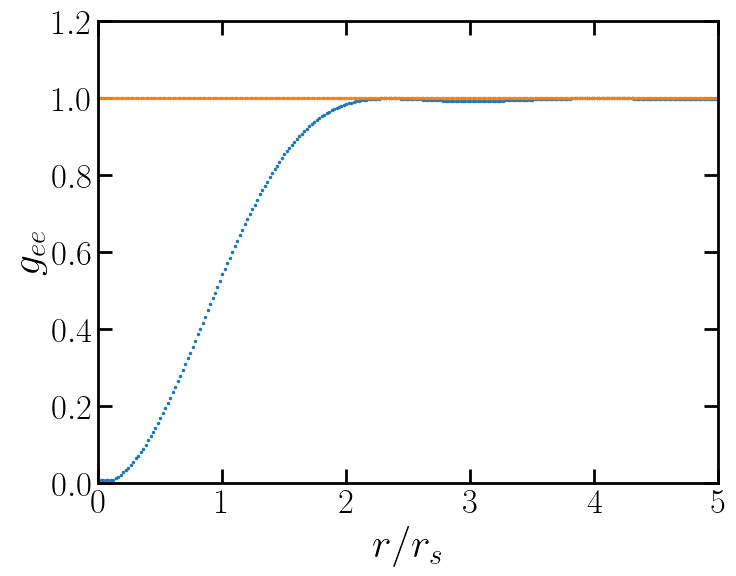

In [214]:
plt.style.use('~/plasma/hnc/hnc_paper.mplstyle')

fig, ax = plt.subplots()

ax.plot(jellium.jellium_hnc.r_array, jellium.jellium_hnc.h_r_matrix[0,0]+1,'.', label='Default Pauli')
ax.plot(jellium.jellium_hnc.r_array, jellium.jellium_hnc.h_r_matrix[0,1]+1,'.', label='Default Pauli')
# ax.plot(jellium.jellium_hnc.r_array, jellium.jellium_hnc.h_r_matrix[0,0]+1, label='Default Pauli')


ax.set_xlabel(r"$r/r_s$")
ax.set_ylabel(r"$g_{ee}$")

ax.set_ylim(0,1.2)
ax.set_xlim(0,5)

#### Plot βu

Missing colon in file '~/plasma/hnc/hnc_paper.mplstyle', line 45 ("text.latex.preamble = r'\\boldmath'")


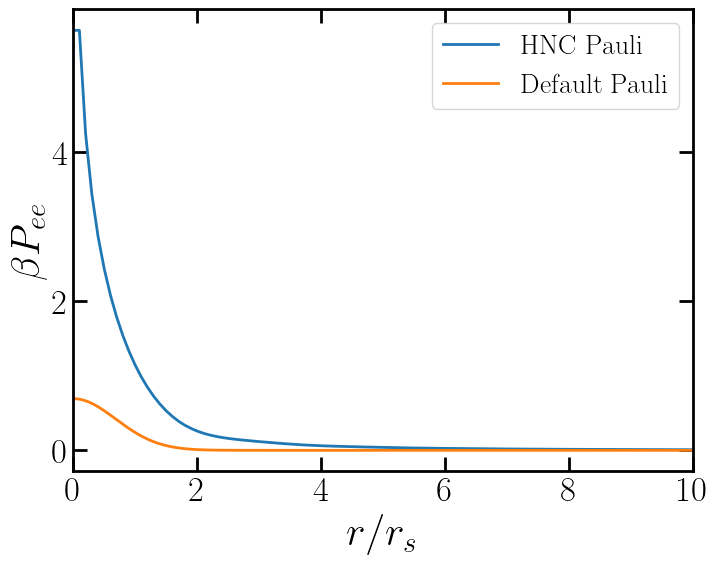

In [215]:
plt.style.use('~/plasma/hnc/hnc_paper.mplstyle')

fig, ax = plt.subplots()

ax.plot(jellium.jellium_hnc.r_array, jellium.βP_uu, label='HNC Pauli')
ax.plot(jellium.jellium_hnc.r_array, jellium.qsp.βv_Pauli(  jellium.jellium_hnc.r_array , jellium.qsp.Λee ), label='Default Pauli')

ax.set_xlabel(r"$r/r_s$")
ax.set_ylabel(r"$\beta P_{ee}$")

# ax.set_ylim(0,1.2)
ax.set_xlim(0,10)
ax.legend()

# New Thermodynamics

In [216]:
ε = 1e-4
jellium_1 = jellium_func(Te_eV*(1-ε), ne_cc)
jellium_1.run_jellium_hnc()
jellium_2 = jellium_func(Te_eV*(1+ε), ne_cc)
jellium_2.run_jellium_hnc()
dT = Te_eV*2*ε

d_βP_eV = -Te_eV**2*(jellium_2.βP_uu - jellium_1.βP_uu)/dT
d_βP_AU = d_βP_eV*eV_to_AU
d_β  = -Te_eV**2*( 1/jellium_2.jellium_hnc.Temp_matrix - 1/jellium_1.jellium_hnc.Temp_matrix)[0,0]/dT * eV_to_AU

Te_in_eV: 1.000
Ti_in_eV: 1.000
Warning, small T<<EF disagree with DW. Need to adjust?
Warning, setting qsp based on self βP
0: Initial condition Total Error: 1.756e-01


/home/zach/plasma/hnc/hnc/PIE_TwoElectron.py:172: RuntimeWarning: overflow encountered in exp
  f_of_k = 1/(  1+np.exp((dense_hnc.k_array/self.qsp.ri)**2/(2*m_e*self.qsp.Te) - η) )


Exiting status 0, reverting to best index so far: 46
Final iter:47, Total Error: 7.488e-09
Te_in_eV: 1.000
Ti_in_eV: 1.000
Warning, small T<<EF disagree with DW. Need to adjust?
Warning, setting qsp based on self βP
0: Initial condition Total Error: 1.756e-01
Exiting status 0, reverting to best index so far: 46
Final iter:47, Total Error: 7.488e-09


In [ ]:
d_β*jellium.qsp.Te_c/jellium.qsp.Te

# Plot $\beta_c u_P$ vs $\frac{\partial \beta_c u_P}{\partial \beta}$

In [ ]:
plt.style.use('~/plasma/hnc/hnc_paper.mplstyle')

fig, ax = plt.subplots()

ax.plot(jellium.jellium_hnc.r_array, jellium.βP_uu, label='HNC Pauli')
ax.plot(jellium.jellium_hnc.r_array, d_βP_AU, label='New HNC Pauli')

ax.plot(jellium.jellium_hnc.r_array, jellium.qsp.βv_Pauli(  jellium.jellium_hnc.r_array , jellium.qsp.Λee ), label='Default Pauli')

ax.set_xlabel(r"$r/r_s$")
ax.set_ylabel(r"$\beta P_{ee}$")

# ax.set_ylim(0,1.2)
ax.set_xlim(0,10)
ax.legend()

In [ ]:
E_ideal_eV_func = lambda Te_eV, Ti_eV: E_Ideal_Fermi_Gas(Te_eV*eV_to_AU, ne_AU)*AU_to_eV + 3/2*Ti_eV

def excess_energy_density_matrix(plasma, d_βP ):
    g_matrix = plasma.jellium_hnc.h_r_matrix+1
    rho_matrix = plasma.jellium_hnc.rho[:,np.newaxis]*plasma.jellium_hnc.rho[np.newaxis,:]
    r = plasma.jellium_hnc.r_array[np.newaxis,np.newaxis,:]
    dr = plasma.jellium_hnc.del_r
    
    u_ex_matrix = np.sum(2*π*rho_matrix[:,:,np.newaxis]*d_βP*g_matrix*r**2*dr,axis=2)
    return u_ex_matrix

E_ideal_eV_func(Te_eV, Te_eV), E_hnc_to_eV( excess_energy_density_matrix(jellium, d_βP_AU)[0,0]), E_hnc_to_eV( excess_energy_density_matrix(jellium, jellium.βP_ee)[0,0])

In [ ]:
(3/2*1*jellium.jellium_hnc.Temp_list*AU_to_eV)[0]* np.array([d_β, 1])

In [ ]:
3/2 * jellium.qsp.Te*AU_to_eV

In [ ]:
jellium.qsp.Te_c/jellium.qsp.Te

# Change of Pauli Potential with Density
We should recover $\beta u_P \propto E_F$

In [218]:
jellium_func = lambda Te_eV, ne_cc: PLASMA(1, 1, ne_cc, 1, Te_eV, Zbar=1, find_βuee=True,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'geometric'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':1000,'N_bins':10000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'tol':1e-12,'alpha_Picard':0.5, 'num_iterations':1e4})

In [219]:
# # Create new thermodynamic variable generator
def excess_energy_density_matrix(plasma, u_matrix ): # Defining   d_βu = dβ_c u/dβ = -T^2 d β_c u/dT
    g_matrix = plasma.jellium_hnc.h_r_matrix+1
    rho_matrix = plasma.jellium_hnc.rho[:,np.newaxis] * plasma.jellium_hnc.rho[np.newaxis,:]
    r = plasma.jellium_hnc.r_array[np.newaxis,np.newaxis,:]
    dr = plasma.jellium_hnc.del_r
    
    u_ex_matrix = np.sum(2*π*rho_matrix[:,:,np.newaxis]*u_matrix*g_matrix*r**2*dr,axis=2)
    return u_ex_matrix

def get_P_matrices(plasma_pair):
    plasma, plasma_ε = plasma_pair
    plasma_ε.run_jellium_hnc(ideal=True, c_s_k_guess = plasma.jellium_hnc.c_s_k_matrix.copy())
    dn_AU = plasma.ni_AU - plasma_ε.ni_AU
    n_AU = plasma.ni_AU
    r_AU = rs_from_n(n_AU)
    # Get pressures
    dlnβcdlnn = (np.log(plasma.qsp.βe_c/plasma_ε.qsp.βe_c))/(np.log(plasma.ni_AU/plasma_ε.ni_AU))
    P_ex_standard = plasma.jellium_hnc.excess_pressure_matrix()
    P_ex_new = plasma.qsp.βe_c/plasma.qsp.βe*P_ex_standard
    P_id_standard = plasma.qsp.Te * np.diag(plasma.jellium_hnc.rho)
    P_id_new      = plasma.qsp.Te * np.diag(plasma.jellium_hnc.rho)*(1 + 3/2*dlnβcdlnn)
    
    dβu_dlnn_AU = n_AU*(plasma.jellium_hnc.βu_r_matrix - plasma_ε.jellium_hnc.βu_r_matrix)/dn_AU

    P_nonstandard = 1/plasma.qsp.βe * excess_energy_density_matrix(plasma,dβu_dlnn_AU  )
    
    # Convert units
    P_standard = P_ex_standard + P_id_standard
    P_id_Mbar, P_ex_Mbar, P_standard_Mbar, P_Mbar = P_hnc_to_Mbar(P_id_new,r_AU), P_hnc_to_Mbar(P_ex_new,r_AU), P_hnc_to_Mbar(P_standard,r_AU), P_hnc_to_Mbar(P_id_new + P_ex_new + P_nonstandard,r_AU)
    return P_id_Mbar, P_ex_Mbar, P_standard_Mbar, P_Mbar

def get_P(plasma, ε=1e-6):
    plasma_pair = [plasma, jellium_func(plasma.Te*AU_to_eV, plasma.ni_cc*(1-ε))]
    P_id_matrix, P_ex_matrix, P_st_matrix, P_matrix = get_P_matrices(plasma_pair)
    return np.sum(P_id_matrix), np.sum(P_ex_matrix), np.sum(P_st_matrix), np.sum(P_matrix)


In [220]:
ni_cc_list = np.geomspace(1e22,5e25,num=20)
Te_eV = 1

βP_list = []
P_Pauli_list = []
h_ee_list = []

for ni_cc in ni_cc_list:
    jellium = jellium_func(Te_eV, ni_cc)
    jellium.run_jellium_hnc(ideal=True)
    
    βP_list.append( jellium.βP_uu )
    # jellium.jellium_hnc.βu_r_matrix = np.array([[jellium.βP_ee]])
    P_Pauli_list.append(  np.array(get_P(jellium)))
    h_ee_list.append([jellium.ideal_jellium_r_array, jellium.ideal_jellium_h_r])
    

Te_in_eV: 1.000
Ti_in_eV: 1.000
Warning, small T<<EF disagree with DW. Need to adjust?
Warning, setting qsp based on self βP
0: Initial condition Total Error: 1.690e-02
Exiting status 0, reverting to best index so far: 43
Final iter:44, Total Error: 6.880e-13
Te_in_eV: 1.000
Ti_in_eV: 1.000
Warning, small T<<EF disagree with DW. Need to adjust?
Warning, setting qsp based on self βP
0: Initial condition Total Error: 4.284e-09
Exiting status 0, reverting to best index so far: 16
Final iter:17, Total Error: 8.654e-13
Te_in_eV: 1.000
Ti_in_eV: 1.000
Warning, small T<<EF disagree with DW. Need to adjust?
Warning, setting qsp based on self βP
0: Initial condition Total Error: 1.801e-02
Exiting status 0, reverting to best index so far: 46
Final iter:47, Total Error: 6.894e-13
Te_in_eV: 1.000
Ti_in_eV: 1.000
Warning, small T<<EF disagree with DW. Need to adjust?
Warning, setting qsp based on self βP
0: Initial condition Total Error: 3.433e-09
Exiting status 0, reverting to best index so far: 1

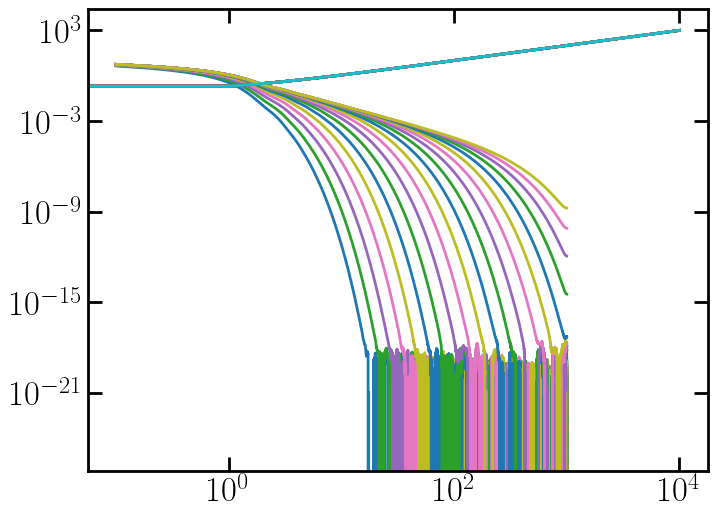

In [221]:
fig, ax  = plt.subplots()

for ni_cc, βP in zip(ni_cc_list, βP_list):
    # ax.plot(jellium.hnc.r_array, np.log(βP), label=f'{ni_cc:0.3e} [1/cc] ')
    ax.plot(jellium.hnc.r_array, βP, label=f'{ni_cc:0.3e} [1/cc] ')
    ax.plot(jellium.hnc.r_array, )
ax.set_yscale('log')
ax.set_xscale('log')
# ax.legend()

(0.0, 5.0)

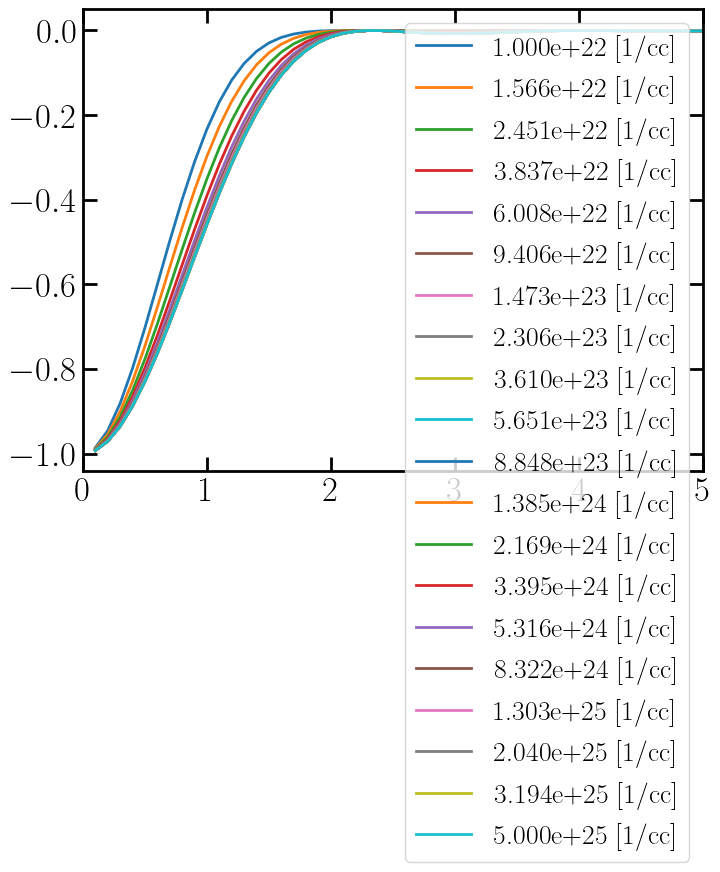

In [222]:
fig, ax  = plt.subplots()

for ni_cc, (r_array, h_ee) in zip(ni_cc_list, h_ee_list):
    ax.plot(r_array, h_ee, label=f'{ni_cc:0.3e} [1/cc] ')

ax.legend()
# ax.set_ylim(-0.001,0.001)
ax.set_xlim(0,5)

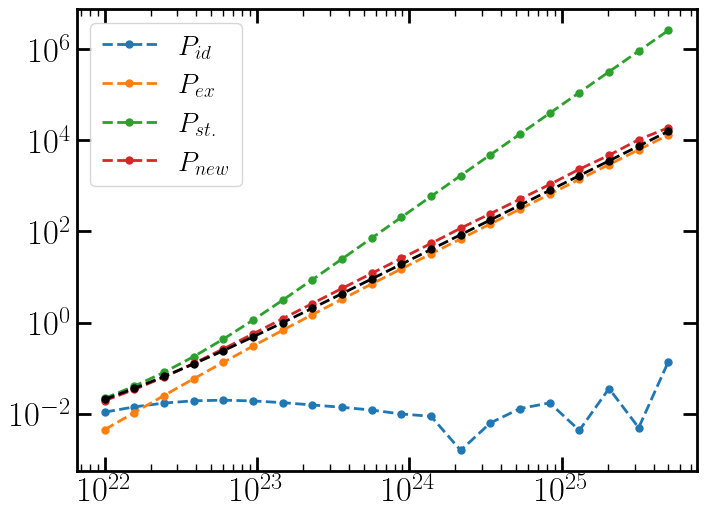

In [223]:
fig, ax  = plt.subplots()

P_ideal_Mbar = [P_Ideal_Fermi_Gas(Te_eV*eV_to_AU, ni_cc/cm_to_AU**3)*AU_to_bar/1e6  for ni_cc in ni_cc_list]

ax.plot(ni_cc_list, np.array(P_Pauli_list)[:,0],'--.', markersize=10, label=r'$P_{id}$')
ax.plot(ni_cc_list, np.array(P_Pauli_list)[:,1],'--.', markersize=10, label=r'$P_{ex}$')
ax.plot(ni_cc_list, np.array(P_Pauli_list)[:,2],'--.', markersize=10, label=r'$P_{st.}$')
ax.plot(ni_cc_list, np.array(P_Pauli_list)[:,3],'--.', markersize=10, label=r'$P_{new}$')
ax.plot(ni_cc_list, P_ideal_Mbar,'k--.',markersize=10)

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='upper left')

In [224]:
from hnc.hnc.misc import Fermi_Energy
np.array(P_Pauli_list)[:,3]/P_ideal_Mbar, 5/2*np.array(P_ideal_Mbar)/(np.array(ni_cc_list)/cm_to_AU**3*Fermi_Energy(np.array(ni_cc_list/cm_to_AU**3))*AU_to_bar/1e6)

(array([0.93914372, 0.94480819, 0.97250413, 1.02503361, 1.09345266,
        1.1629229 , 1.22218031, 1.26849295, 1.30113832, 1.32587638,
        1.34630479, 1.35698502, 1.3888591 , 1.37278361, 1.35535267,
        1.34891367, 1.38187545, 1.32457866, 1.38216546, 1.19847074]),
 array([1.89698856, 1.57541631, 1.35683604, 1.21365606, 1.12392094,
        1.07017335, 1.03916586, 1.02170056, 1.01198179, 1.00660408,
        1.00363665, 1.00200159, 1.0011013 , 1.00060585, 1.00033323,
        1.00018334, 1.00010074, 1.00005549, 1.00003039, 1.00001665]))

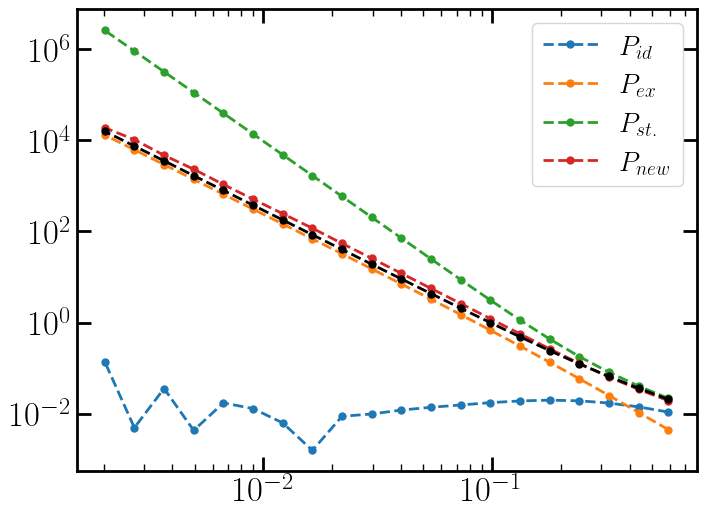

In [225]:
fig, ax  = plt.subplots()

P_ideal_Mbar = [P_Ideal_Fermi_Gas(Te_eV*eV_to_AU, ni_cc/cm_to_AU**3)*AU_to_bar/1e6  for ni_cc in ni_cc_list]
ni_cc_to_Θ = lambda ni_cc: Degeneracy_Parameter(jellium.qsp.Te, ni_cc/cm_to_AU**3)
ni_cc_list = np.array(ni_cc_list)

ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,0],'--.', markersize=10, label=r'$P_{id}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,1],'--.', markersize=10, label=r'$P_{ex}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,2],'--.', markersize=10, label=r'$P_{st.}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,3],'--.', markersize=10, label=r'$P_{new}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), P_ideal_Mbar,'k--.',markersize=10)

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='upper right')

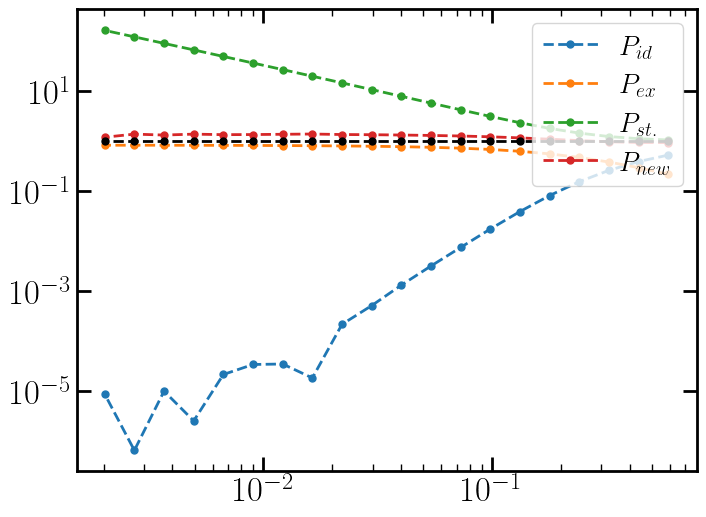

In [226]:
fig, ax  = plt.subplots()

P_ideal_Mbar = [P_Ideal_Fermi_Gas(Te_eV*eV_to_AU, ni_cc/cm_to_AU**3)*AU_to_bar/1e6  for ni_cc in ni_cc_list]
ni_cc_to_Θ = lambda ni_cc: Degeneracy_Parameter(jellium.qsp.Te, ni_cc/cm_to_AU**3)
ni_cc_list = np.array(ni_cc_list)

ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,0]/P_ideal_Mbar,'--.', markersize=10, label=r'$P_{id}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,1]/P_ideal_Mbar,'--.', markersize=10, label=r'$P_{ex}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,2]/P_ideal_Mbar,'--.', markersize=10, label=r'$P_{st.}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,3]/P_ideal_Mbar,'--.', markersize=10, label=r'$P_{new}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.ones_like(P_ideal_Mbar),'k--.',markersize=10)

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='upper right')

Missing colon in file '~/plasma/hnc/hnc_paper.mplstyle', line 45 ("text.latex.preamble = r'\\boldmath'")


Text(0.5, 0, '$\\theta$')

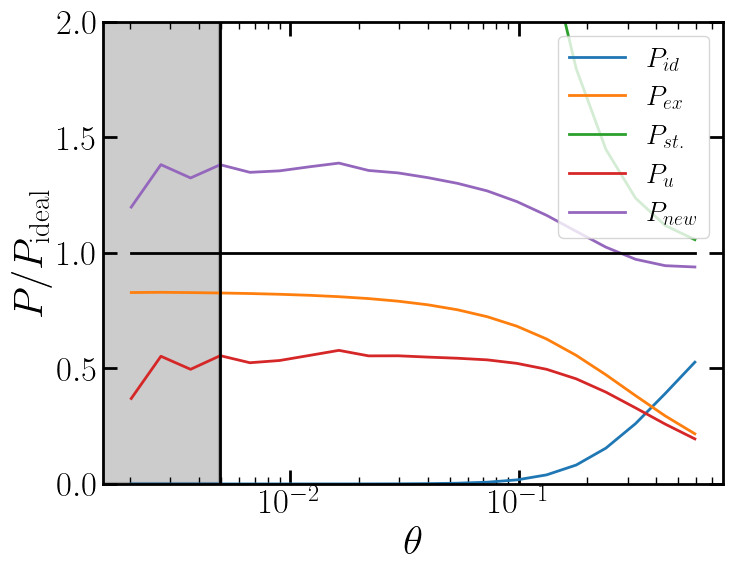

In [227]:
plt.style.use('~/plasma/hnc/hnc_paper.mplstyle')
fig, ax  = plt.subplots()

P_ideal_Mbar = [P_Ideal_Fermi_Gas(Te_eV*eV_to_AU, ni_cc/cm_to_AU**3)*AU_to_bar/1e6  for ni_cc in ni_cc_list]
ni_cc_to_Θ = lambda ni_cc: Degeneracy_Parameter(jellium.qsp.Te, ni_cc/cm_to_AU**3)
ni_cc_list = np.array(ni_cc_list)

ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,0]/P_ideal_Mbar,'-', markersize=10, label=r'$P_{id}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,1]/P_ideal_Mbar,'-', markersize=10, label=r'$P_{ex}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,2]/P_ideal_Mbar,'-', markersize=10, label=r'$P_{st.}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), (np.array(P_Pauli_list)[:,3]-np.array(P_Pauli_list)[:,1]-np.array(P_Pauli_list)[:,0] )/P_ideal_Mbar,'-', markersize=10, label=r'$P_{u}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,3]/P_ideal_Mbar,'-', markersize=10, label=r'$P_{new}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.ones_like(P_ideal_Mbar),'k-',markersize=10)

ax.set_xscale('log')
# ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_ylim(0,2)
ax.axvspan(0 ,ni_cc_to_Θ(ni_cc_list[-4]), color='k', alpha=0.2, linewidth=3)
ax.vlines(ni_cc_to_Θ(ni_cc_list[-4]), 0,2, color='k', linewidth=2)
ax.set_ylabel(r'$P/P_\text{ideal}$')
ax.set_xlabel(r'$\theta$')

In [228]:
np.array(P_Pauli_list)[:,3]/P_ideal_Mbar

array([0.93914372, 0.94480819, 0.97250413, 1.02503361, 1.09345266,
       1.1629229 , 1.22218031, 1.26849295, 1.30113832, 1.32587638,
       1.34630479, 1.35698502, 1.3888591 , 1.37278361, 1.35535267,
       1.34891367, 1.38187545, 1.32457866, 1.38216546, 1.19847074])

In [229]:
(np.array(P_Pauli_list)[:,3]-np.array(P_Pauli_list)[:,1]-np.array(P_Pauli_list)[:,0] )/P_ideal_Mbar

array([0.19496743, 0.25898634, 0.32913182, 0.39743647, 0.4549535 ,
       0.49629731, 0.52191126, 0.5370915 , 0.54410171, 0.54908182,
       0.55469972, 0.55436883, 0.57822317, 0.55613412, 0.53431379,
       0.52466   , 0.55527449, 0.49621331, 0.55266331, 0.36990645])